In [87]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

## Dataset Import

In [88]:
data = pd.read_csv('Pizza-Price.csv')
data

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750
5,F,no,yes,15,yes,900
6,G,yes,no,9,no,600
7,H,yes,no,9,yes,700
8,I,no,yes,15,no,750
9,J,no,yes,15,no,700


## Menghilangkan atribute reataurant

In [89]:
data = data.drop('Restaurant', axis=1)

## Mengubah data karegori menjadi kode numerik

In [90]:
data = pd.get_dummies(data, columns=['Extra Cheeze', 'Extra Mushroom', 'Extra Spicy'], drop_first=True)

## Memecah atribut dan label

In [91]:
X = data.drop('Price', axis=1)
y = data['Price']

## Data splitting

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Membangun model Linier Regression

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Perhitungan akurasi model

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 84.3032703635994
MSE: 7979.205291656035
RMSE: 89.32639750743357


## Implementasi model terhadap data testing

In [95]:
test_predictions = model.predict(X_test)

In [96]:
y_test= y_test.reset_index()
test_predictions = pd.DataFrame(test_predictions)

## Perbandingan data asli dan hasil prediksi

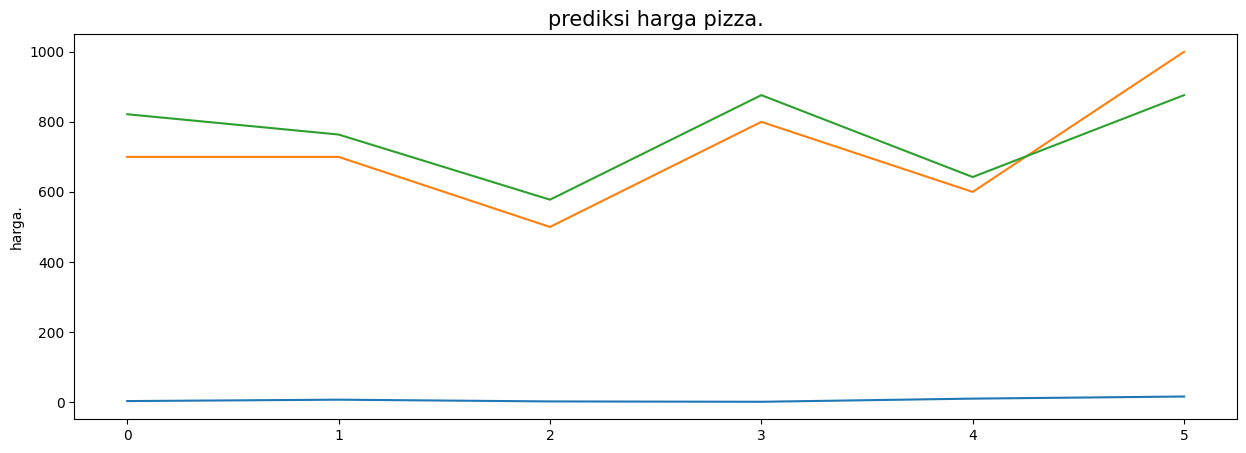

In [97]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(test_predictions)
plt.title('prediksi harga pizza.', fontsize=15)
plt.ylabel('harga.')
plt.show()
